![Banner](./img/AI_Special_Program_Banner.jpg)



# Exercises for Classification
---

In this exercise, you are to *apply* the classification algorithms that you have now become familiar with. Specifically, you should try out which algorithm performs *best* on a data set about heart disease: a **decision tree**, a **logistic regression** or the **K-Nearest-Neighbor algorithm**.

## Data
---

Here we look at the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/heart+disease). This contains patient data from a hospital in Cleveland. Here are the relevant attributes:

### Attributes

* **age**: age in years
* **sex**: sex
* **cp**: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
* **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
* **chol**: serum cholestoral in mg/dl
* **fbs**: (fasting blood sugar > 120 mg/dl) (true; false)
* **restecg**: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
* **thalach**: maximum heart rate achieved
* **exang**: exercise induced angina (yes; no)
* **oldpeak:** ST depression induced by exercise relative to rest
* **slope:** the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
* **ca:** number of major vessels (0-3) colored by flourosopy
* **thal:** normal; fixed defect; reversable defect
* **num:** 0 (no presence) to 4

For our classification model, a precise understanding of the individual attributes and their meaning is not important in the context of this exercise. However, in reality, data science and machine learning are **interdisciplinary** fields, so the validity of the data should be clarified as well as the resulting ML models.

Further information on the data can be found in `data/heart-disease.names`.

### Reading in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df_raw = pd.read_csv('./data/heart_desease.csv')

In [33]:
df_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,typical angina,145.0,233.0,True,ventricual hypertrophy,150.0,yes,2.3,downsloping,0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,False,ventricual hypertrophy,108.0,no,1.5,flat,3,normal,2
2,67.0,male,asymptomatic,120.0,229.0,False,ventricual hypertrophy,129.0,no,2.6,flat,2,reversable defect,1
3,37.0,male,non-anginal pain,130.0,250.0,False,normal,187.0,yes,3.5,downsloping,0,normal,0
4,41.0,female,atypical angina,130.0,204.0,False,ventricual hypertrophy,172.0,yes,1.4,upsloping,0,normal,0


In [34]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 31.2+ KB


We note: our data set contains both **numerical** and **categorical** features!

<h1 style="color:blue">Exercises</h1>

In this exercise, you are to use 3 different classification models for the available data: a **decision tree**, a **logistic regression** and the **K-Nearest-Neighbor algorithm**. Which model best represents the data at hand?

**Note:** For the sake of simplicity, you should determine the performance of the algorithms using the *entire* data. So you *train* the model on the same data on which you then *evaluate* the model. In the next lesson, we will explain in detail why this is not actually useful...

---

<h2 style="color:blue">Task 1 - Decision tree</h2>

Before you can train a decision tree, the data must first be prepared.

<h3 style="color:blue">Task 1.1 - Binarization of the label</h3>

The target size (*label*) that we want to predict is stored in the variable `num`. This indicates 5 stages of reduction in the diameter of vessels, which determine the presence of heart disease. No disease is present for the value $0$. Analogous to the publications on this data set, we want to consider this classification problem as a **binary decision problem**. This means that we only distinguish between normal findings ($\hat = 0$) and the presence of a disease ($1,\dots,4$).

Therefore, first carry out a binarization ($0,1$) of the target. Save the result in the variable `y`.

**Notes:**

* There are many ways to achieve this, but Panda's [apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) is certainly a good option.

In [35]:
# Your solution
def convert_num_to_y(value):
    if value == 0:
        return 0
    else:
        return 1

y = df_raw['num'].apply(convert_num_to_y)

# 결과 확인
print(df_raw['num'])
print(y)

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64
0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64


<h3 style="color:blue">Aufgabe 1.2 - Integer/Ordinal Encoding </h3>

In order to use the categorical variables as input for the model, they must be converted into numerical values. The easiest way to achieve this is through *Integer Encoding* (also *Ordinal Encoding*). Here, each value of a variable is simply assigned an integer value. This type of encoding is actually only appropriate if the characteristics are ordinal scaled, i.e. if there is a fixed relationship between the categories.

Perform an integer encoding for the categorical variables. Save the resulting feature matrix (containing all encoded and numeric variables) as `X_enc`.

**Notes:**

* You can perform the encoding by using pandas:
    1. Using the pandas [Categories](https://pandas.pydata.org/docs/user_guide/categorical.html)
* The label vector `y` must not be contained in the feature matrix!

**Solution:**

In [36]:
df = df_raw.copy()

In [37]:
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [38]:
X_enc = df.drop('num', axis=1)
X_enc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1,3,145.0,233.0,1,2,150.0,1,2.3,0,0,0
1,67.0,1,0,160.0,286.0,0,2,108.0,0,1.5,1,3,1
2,67.0,1,0,120.0,229.0,0,2,129.0,0,2.6,1,2,2
3,37.0,1,2,130.0,250.0,0,1,187.0,1,3.5,0,0,1
4,41.0,0,1,130.0,204.0,0,2,172.0,1,1.4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,3,110.0,264.0,0,1,132.0,1,1.2,1,0,2
299,68.0,1,0,144.0,193.0,1,1,141.0,1,3.4,1,2,2
300,57.0,1,0,130.0,131.0,0,1,115.0,0,1.2,1,1,2
301,57.0,0,1,130.0,236.0,0,2,174.0,1,0.0,1,1,1


In [39]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,3,145.0,233.0,1,2,150.0,1,2.3,0,0,0,0
1,67.0,1,0,160.0,286.0,0,2,108.0,0,1.5,1,3,1,2
2,67.0,1,0,120.0,229.0,0,2,129.0,0,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,1,187.0,1,3.5,0,0,1,0
4,41.0,0,1,130.0,204.0,0,2,172.0,1,1.4,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,3,110.0,264.0,0,1,132.0,1,1.2,1,0,2,1
299,68.0,1,0,144.0,193.0,1,1,141.0,1,3.4,1,2,2,2
300,57.0,1,0,130.0,131.0,0,1,115.0,0,1.2,1,1,2,3
301,57.0,0,1,130.0,236.0,0,2,174.0,1,0.0,1,1,1,1


<h3 style="color:blue">Task 1.3 - Training the decision tree</h3>

Train a decision tree with a maximum depth of 3. Use the Gini index as a measure of impurity.

**Notes:**
* Determine the accuracy of your model
* Which features were particularly important for the classification?
* Visualize the tree

In [40]:
import numpy as np

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_text

Accuracy:  0.7692307692307693
age: 0.12585713094291878
sex: 0.09020985852592982
cp: 0.35583358516034125
trestbps: 0.039685419294160945
chol: 0.0
fbs: 0.0
restecg: 0.0
thalach: 0.02909521866641541
exang: 0.0
oldpeak: 0.08976223362433548
slope: 0.0
ca: 0.1740019597268861
thal: 0.09555459405901234


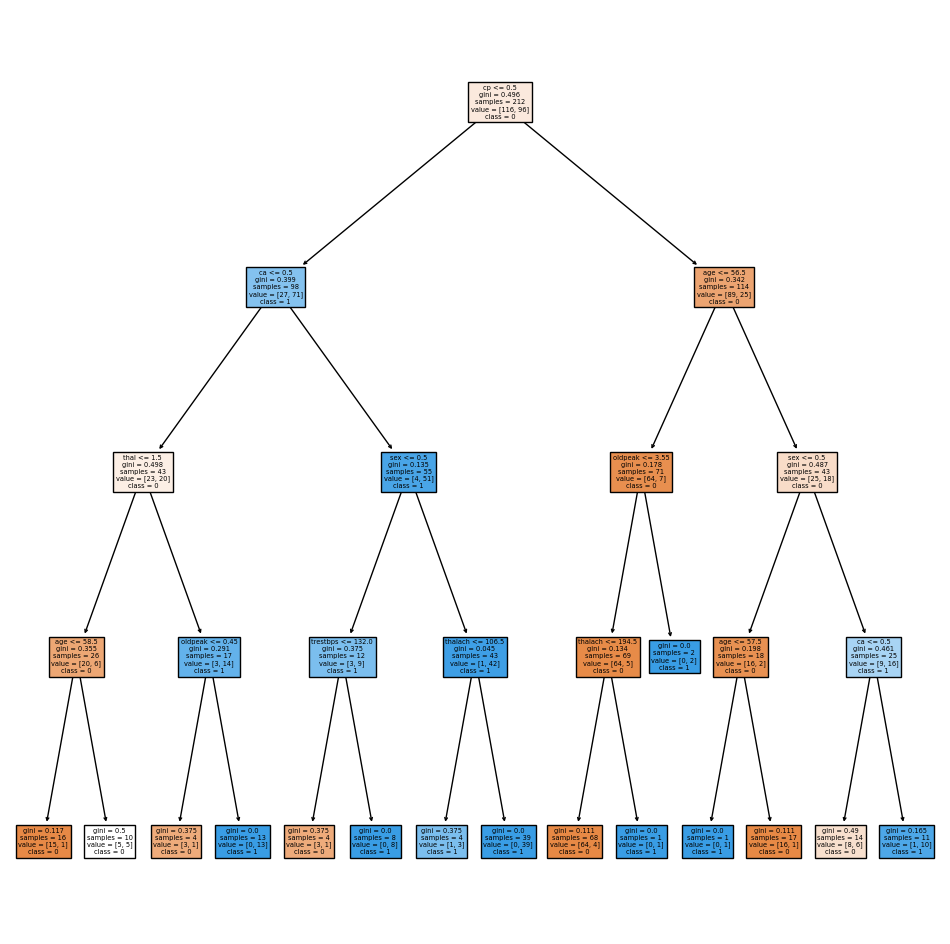

In [66]:
# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# 학습된 모델에서 feature importance 얻기
feature_importance = model.feature_importances_

# 각 feature와 그에 대응하는 importance 출력
for feature, importance in zip(X_enc.columns, feature_importance):
    print(f"{feature}: {importance}")

# Decision Tree 그리기
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model, feature_names=X_enc.columns, class_names=['0', '1'], filled=True, ax=ax)
plt.show()

<h3 style="color:blue">Aufgabe 1.4 - One-hot Encoding </h3>

As mentioned in task 1.2, integer encoding only makes sense if the features are ordinal scaled. However, this is only partially the case with our data. We should therefore look at a second type of encoding: [one-hot encoding](https://en.wikipedia.org/wiki/One-hot). Here, each characteristic value of a categorical variable is regarded as a new binary variable.

Carry out a one-hot encoding of the categorical variables. Save the resulting feature matrix (contains all coded and numerical variables) as `X_ohe`.

**Notes:**
* You can perform one-hot encoding again in two ways:
    1. Using the pandas [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
    2. Using the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from `scikit-learn`
* You can find out more about the difference between the coding types, for example [here](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

In [45]:
# Your solution
df_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,typical angina,145.0,233.0,True,ventricual hypertrophy,150.0,yes,2.3,downsloping,0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,False,ventricual hypertrophy,108.0,no,1.5,flat,3,normal,2
2,67.0,male,asymptomatic,120.0,229.0,False,ventricual hypertrophy,129.0,no,2.6,flat,2,reversable defect,1
3,37.0,male,non-anginal pain,130.0,250.0,False,normal,187.0,yes,3.5,downsloping,0,normal,0
4,41.0,female,atypical angina,130.0,204.0,False,ventricual hypertrophy,172.0,yes,1.4,upsloping,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,typical angina,110.0,264.0,False,normal,132.0,yes,1.2,flat,0,reversable defect,1
299,68.0,male,asymptomatic,144.0,193.0,True,normal,141.0,yes,3.4,flat,2,reversable defect,2
300,57.0,male,asymptomatic,130.0,131.0,False,normal,115.0,no,1.2,flat,1,reversable defect,3
301,57.0,female,atypical angina,130.0,236.0,False,ventricual hypertrophy,174.0,yes,0.0,flat,1,normal,1


In [50]:
X_ohe = pd.get_dummies(df_raw, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
X_ohe.drop('num', axis=1, inplace=True)
X_ohe

,age,trestbps,chol,thalach,oldpeak,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,...,slope_upsloping,ca_0,ca_1,ca_2,ca_3,ca_unknown,thal_fixed defect,thal_normal,thal_reversable defect,thal_unknown
0,63.0,145.0,233.0,150.0,2.3,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,67.0,160.0,286.0,108.0,1.5,False,True,True,False,False,...,False,False,False,False,True,False,False,True,False,False
2,67.0,120.0,229.0,129.0,2.6,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,37.0,130.0,250.0,187.0,3.5,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,41.0,130.0,204.0,172.0,1.4,True,False,False,True,False,...,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,132.0,1.2,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
299,68.0,144.0,193.0,141.0,3.4,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
300,57.0,130.0,131.0,115.0,1.2,False,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
301,57.0,130.0,236.0,174.0,0.0,True,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False


<h3 style="color:blue">Task 1.5 - Decision tree with OHE data</h3>

Similarly to 1.3, train a decision tree again based on the one-hot coded data. What are the differences in accuracy and feature importance?

Accuracy:  0.7582417582417582
age: 0.09612442788281833
sex: 0.02344517173746198
cp: 0.0
trestbps: 0.006089584117651243
chol: 0.0902296200780157
fbs: 0.07861843937555234
restecg: 0.012954206213912571
thalach: 0.3612091107908181
exang: 0.0
oldpeak: 0.0
slope: 0.0
ca: 0.0
thal: 0.0


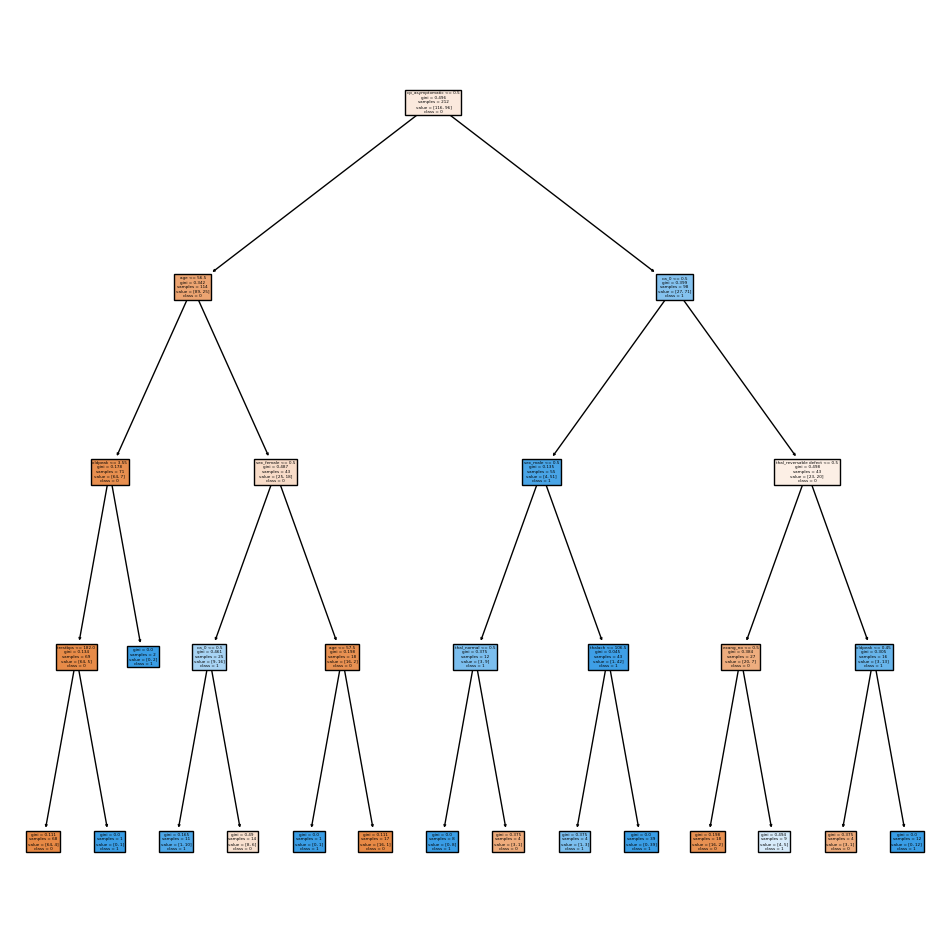

In [67]:
# Your solution
# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.3, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# 학습된 모델에서 feature importance 얻기
feature_importance = model.feature_importances_

# 각 feature와 그에 대응하는 importance 출력
for feature, importance in zip(X_enc.columns, feature_importance):
    print(f"{feature}: {importance}")

# Decision Tree 그리기
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model, feature_names=X_ohe.columns, class_names=['0', '1'], filled=True, ax=ax)
plt.show()

1.3 Accuracy:  0.7692307692307693
the most important feature
cp: 0.35583358516034125

1.5 Accuracy:  0.7582417582417582
the most important feature
thalach: 0.3612091107908181

<h2 style="color:blue">Task 2 - Logistic regression</h2>

With logistic regression, too, the data must first be prepared.

<h3 style="color:blue">Task 2.1 - Scaling the data</h3>

A major advantage of decision trees is the ability to work directly with the unscaled raw data. Logistic regression is also insensitive to unscaled data. However, since it makes sense to **regularize** the logistic regression (and this is also the default in `scikit-learn`), the data should be scaled accordingly. Suggestions as to why this is the case can be found [here](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression) and [here](https://stats.stackexchange.com/questions/290958/logistic-regression-and-scaling-of-features). A brief, general explanation of feature scaling is also available from [Raschka](https://sebastianraschka.com/faq/docs/when-to-standardize.html).

Scale the data (**both integer encoded and OHE**) using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from `scikit-learn`. Save your feature matrix in `X_enc_std` and `X_ohe_std`.

**Notes:**
* Whether the binary categorical variables really need to be scaled is at least questionable. For the sake of simplicity, you can simply scale them as well. More information can be found [here](https://stats.stackexchange.com/questions/359015/ridge-lasso-standardization-of-dummy-indicators).

In [70]:
# Your solution
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_enc_std = scaler.fit_transform(X_enc)
X_ohe_std = scaler.fit_transform(X_ohe)

In [71]:
X_enc_std

array([[ 0.94872647,  0.68620244,  1.97997613, ..., -2.27457861,
        -0.71312935, -2.24449884],
       [ 1.39200191,  0.68620244, -0.93231886, ..., -0.64911323,
         2.27412678, -0.56941719],
       [ 1.39200191,  0.68620244, -0.93231886, ..., -0.64911323,
         1.27837473,  1.10566446],
       ...,
       [ 0.28381332,  0.68620244, -0.93231886, ..., -0.64911323,
         0.28262269,  1.10566446],
       [ 0.28381332, -1.4572959 ,  0.03844614, ..., -0.64911323,
         0.28262269, -0.56941719],
       [-1.82174501,  0.68620244,  1.00921113, ...,  0.97635214,
         3.26987882, -0.56941719]])

In [73]:
X_ohe_std

array([[ 0.94872647,  0.75752504, -0.2649003 , ..., -1.10076284,
        -0.79311554, -0.08151391],
       [ 1.39200191,  1.61121989,  0.76041519, ...,  0.9084609 ,
        -0.79311554, -0.08151391],
       [ 1.39200191, -0.6652997 , -0.34228261, ..., -1.10076284,
         1.26085034, -0.08151391],
       ...,
       [ 0.28381332, -0.0961698 , -2.23814899, ..., -1.10076284,
         1.26085034, -0.08151391],
       [ 0.28381332, -0.0961698 , -0.20686358, ...,  0.9084609 ,
        -0.79311554, -0.08151391],
       [-1.82174501,  0.35913411, -1.38694368, ...,  0.9084609 ,
        -0.79311554, -0.08151391]])

<h3 style="color:blue">Task 2.2 - Logistic regression</h3>

Perform a logistic regression. Test your model with both the scaled integer encoded data and the scaled OHE data.

**Notes:**
* Feel free to try out several (hyper)parameters for the logistic regression. For some configurations, the solution may not converge (or not in the given number of iterations).

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
# Your solution

X_train, X_test, y_train, y_test = train_test_split(X_enc_std, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8443396226415094
0.8241758241758241


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe_std, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8726415094339622
0.8351648351648352


<h2 style="color:blue">Task 3 - K-Nearest-Neighbors</h2>

KNN uses distances to determine the nearest neighbors. However, since we find categorical variables without a fixed order in our data, the calculation of a distance measure is questionable (see analogous exercise on clustering). We therefore have to use separate distance and similarity measures again.

<h3 style="color:blue">Task 3.1 - K-Nearest-Neighbors</h3>

Apply a KNN model with $k=5$ based on the Gower distance. Determine the accuracy.

**Notes:**
* The Gower distance is suitable here not only because of the categorical variables, but also because of the normalization ($[0,1]$) of the distance values.
* [Gower](https://pypi.org/project/gower/) can be applied directly to the raw data
* What accuracy does the KNN model approach for particularly large $k$?

In [77]:
# Your solution
import gower

In [78]:
gower_matrix = gower.gower_matrix(X_ohe)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(gower_matrix, y)
print(knn.score(gower_matrix, y))

0.8481848184818482
